**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Topic 11: nMDS of the diatom data in Mayombo et al. (2019)

Kelp forests are known to host a large biomass of epiphytic fauna and flora, including diatoms, which constitute the base of aquatic food webs and play an important role in the transfer of energy to higher trophic levels. Epiphytic diatom assemblages associated with two common species of South African kelps, *Ecklonia maxima* and *Laminaria pallida*, were investigated in this study. Primary blades of adult and juvenile thalli of both kelp species were sampled at False Bay in July 2017 and analysed using scanning electron microscopy. The diatom community data are here subjected to a suit of multivariate methods in order to show the structure of the diatom flora as a function of i) kelp species, and ii) kelp size. Read Mayombo et al. (2019) for more details and the findings of the research.

Some feedback was received by anonymous reviewers as part of the peer review process, and it together with my response is repeated below.

**Reviewer 1**

The design of the observational study includes 2 treatments - age (young versus old) and host species (*Laminaria* versus *Ecklonia*), 4 replicates (4 primary blades from each combination of host algae and age), and 3 subsamples from each blade (pseudoreplicates, if treated incorrectly as replicates). The experimental design is analogous to a 2-way ANOVA, but with community data instead of a single individual response variable. This design can evaluate interactive effects between the two treatments (age and species). The authors’ experimental design is most suited to analyses using PERMANOVA, which is the community statistics version of the ANOVA.

Please indicate for the readers why the data were transformed and standardised using the stated procedures. Definitely a good idea to transform data, but the readers need to understand why particular procedures were employed. Please describe the Wisconsin double standardisation (row/column standardised by row/column total – to produce relative abundance to total and column/row standardised by column/row max – to produce abundance relative to species max abundance). Why a double standardisation + square-root transformation, as opposed to a single row/column standardisation by row/column total + square-root transformation?

Please indicate for the readers why the data were transformed and standardised using the stated procedures. Definitely a good idea to transform data, but the readers need to understand why particular procedures were employed. Please describe the Wisconsin double standardisation:

* row/column standardised by row/column total to produce relative abundance to total and column/row standardised; vs.
* column/row max–to produce abundance relative to species max abundance.

**AJS: About ANOSIM and PERMANOVA**

"Overall, Analysis of Similarities (ANOSIM) and the Mantel test were very sensitive to heterogeneity in dispersions, with ANOSIM generally being more sensitive than the Mantel test. In contrast, PERMANOVA and Pillai’s trace were largely unaffected by heterogeneity for balanced designs. [...]. PERMANOVA was also unaffected by differences in correlation structure. [...] PERMANOVA was generally, but not always, more powerful than the others to detect changes in community structure."

**AJS: About data transformation**

Useful when the range of data values is very large. Data are square root transformed, and then submitted to Wisconsin double standardisation, or species divided by their maxima, and stands standardised to equal totals. These two standardisations often improve the quality of ordinations.

## Set-up the analysis environment

In [1]:
library(vegan)
# library(BiodiversityR)
library(tidyverse)
library(ggplot2)
library(plyr)
library(tibble)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘pl

## Load and prepare the data

### The species data

The diatom species data include the following:

* columns: diatom genera
* rows: samples (samples taken from two species of kelp; equivalent to sites in other species x sites tables)
* row names correspond to combinations of the factors in the columns inside `PB_diat_env.csv`

where "host_size" is 'A' for adult kelp plant (host), 'J' for juvenile kelp plant (host), "host_spp" is 'Lp' for kelp species *Laminaria pallida* (host), 'Em' for kelp plant *Ecklonia maxima* (host), "plant" is the unique number identifying a specific kelp plant, and "rep" is the replicate tissue sample from each kelp host plant from which the diatoms were extracted.

In [2]:
# with shortened name to fix nMDS overplotting
spp <- read.csv(file = "/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diatoms/PB_data_matrix_abrev.csv",
                row.names = "Replicate", sep = ",", header = TRUE)
spp[1:6, 1:6]

# with full names
spp2 <- read.csv(file = "/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diatoms/PB_data_matrix.csv",
                 row.names = "Replicate", sep = ",", header = TRUE)
spp2[1:6, 1:6]

# remove ".spp" from column header name
colnames(spp) <- str_replace(colnames(spp), "\\.spp", "")
colnames(spp2) <- str_replace(colnames(spp2), "\\.spp", "")

,Amphora.spp,Asteromphalus.spp,Cocconeis.spp,Craspedostauros.spp,Cylindrotheca.spp,Diploneis.spp
,<int>,<int>,<int>,<int>,<int>,<int>
APB1LP1,0,0,0,0,0,0
APB1LP2,0,0,0,0,0,0
APB1LP3,0,0,0,0,0,0
APB2LP1,0,0,0,0,0,0
APB2LP2,0,0,0,0,0,0
APB2LP3,0,0,0,0,0,0


,Amphora.spp,Asteromphalus.spp,Cocconeis.spp,Craspedostauros.spp,Cylindrotheca.spp,Diploneis.spp
,<int>,<int>,<int>,<int>,<int>,<int>
APB1LP1,0,0,0,0,0,0
APB1LP2,0,0,0,0,0,0
APB1LP3,0,0,0,0,0,0
APB2LP1,0,0,0,0,0,0
APB2LP2,0,0,0,0,0,0
APB2LP3,0,0,0,0,0,0


Logarithmic transformation as suggested by Anderson et al. (2006): $log_{b}(x) + 1$ for $x > 0$, where $b$ is the base of the logarithm; zeros are left as zeros. Higher bases give less weight to quantities and more to presences.

In [3]:
spp.log <- decostand(spp, method = "log")
spp.log.dis <- vegdist(spp.log, method = "bray")

### The 'environmental' data

The content is described above; these variables are categorical vars -- they are not actually 'environmental' data, but their purpose in the analysis is analogous to true environmental data; it's simply data that describe where the samples were taken from.

In [4]:
env <- tibble(read.csv(file = "/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diatoms/PB_diat_env.csv",
                          sep = ",", header = TRUE))
env$plant <- as.factor(env$plant)
env$rep <- as.factor(env$rep)
head(env)

replicate,host_size,host_spp,plant,rep
<chr>,<chr>,<chr>,<fct>,<fct>
APB1LP1,A,Lp,1,1
APB1LP2,A,Lp,1,2
APB1LP3,A,Lp,1,3
APB2LP1,A,Lp,2,1
APB2LP2,A,Lp,2,2
APB2LP3,A,Lp,2,3


With the environmental data (factors), the following analyses can be done:

* ✘ Discriminant Analysis (DA)
* ✘ Analysis of Similarities (ANOSIM)
* ✔︎ Permutational Analysis of Variance (PERMANOVA)
* ✘ Mantel test

We will do an nMDS and PERMANOVA.

## Multivariate homogeneity of group dispersions (variances)

Before doing the PERMANOVA (testing differences between means), first check to see if the dispersion is the same. See `?adonis2` for more on this.

**Homogeneity of groups**
`betadisper()` evaluates the differences in group homogeneities. We can view it as being analogous to Levene’s test of the equality of variances. The null hypothesis evaluated is that the population variances are equal. Unfortunately we can only use one factor as an independent variable so it is not yet possible to look for interactions (species × size). 

So, we test the $H_{0}$ that the dispersion (variance) in diatom community structure does not differ between the two host species:

In [5]:
(mod.spp <- with(env, betadisper(spp.log.dis, host_spp)))
anova(mod.spp)


	Homogeneity of multivariate dispersions

Call: betadisper(d = spp.log.dis, group = host_spp)

No. of Positive Eigenvalues: 20
No. of Negative Eigenvalues: 21

Average distance to median:
    Em     Lp 
0.3640 0.4391 

Eigenvalues for PCoA axes:
(Showing 8 of 41 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.9619 1.7968 1.3888 1.0040 0.8491 0.6366 0.3132 0.3008 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,1,0.05876092,0.05876092,2.608665,0.1141428
Residuals,40,0.90101136,0.02252528,NA,NA


There is no difference in dispersion between the diatom communities on the two host species. Apply the same procedure to see if host size has an effect:

In [6]:
(mod.size <- with(env, betadisper(spp.log.dis, host_size)))
anova(mod.size)


	Homogeneity of multivariate dispersions

Call: betadisper(d = spp.log.dis, group = host_size)

No. of Positive Eigenvalues: 20
No. of Negative Eigenvalues: 21

Average distance to median:
     A      J 
0.4005 0.3889 

Eigenvalues for PCoA axes:
(Showing 8 of 41 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.9619 1.7968 1.3888 1.0040 0.8491 0.6366 0.3132 0.3008 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,1,0.001413372,0.001413372,0.0603906,0.8071362
Residuals,40,0.936153685,0.023403842,NA,NA


No, it does not have an effect either. Make some plots to visualise the pstterrns:

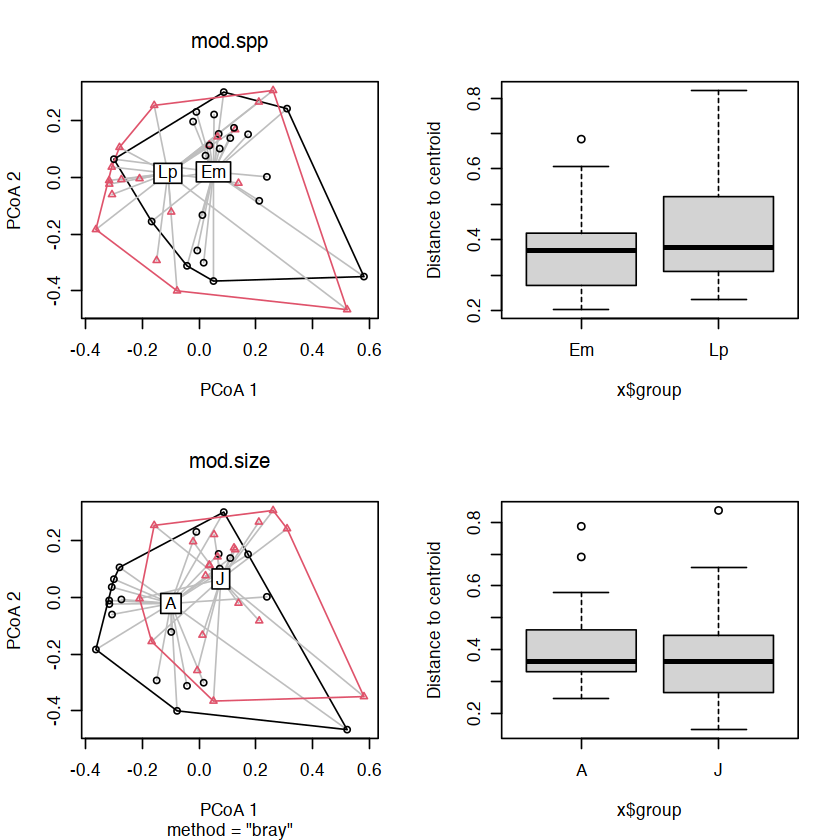

In [7]:
par(mfrow = c(2, 2))
plot(mod.spp, sub = NULL)
boxplot(mod.spp)

plot(mod.size)
boxplot(mod.size)

Optionally, we can confirm the above analysis with the `permutest()` function. `permutest()` is a permutational ANOVA-like test that tests the $H_{0}$ that there is no difference in the multivariate dispersion of diatom community structure between *Ecklonia maxima* and *Laminaria pallida*, and between adult and juvenile plants:

In [8]:
permutest(mod.spp) # there is in fact no difference

permutest(mod.size) # nope...


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     1 0.05876 0.058761 2.6087    999  0.114
Residuals 40 0.90101 0.022525                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.00141 0.0014134 0.0604    999  0.815
Residuals 40 0.93615 0.0234038                     

It should be sufficient to do the `anova()`, above, though. You can safely ignore the `permutest()`.

## PERMANOVA

Permutational multivariate Analysis of Variance (PERMANOVA; Anderson and Walsh, 2013) uses distance matrices (Bray-Curtis similarities by default), whereas ANOSIM uses only ranks of Bray-Curtis. The former therefore preserves more information and it is the recommended approach to test for differences between multivariate means. PERMANOVA also allows for variation partitioning and permits for more complex designs (multiple factors, nested factors, interactions, covariates, etc.). To this end, we use `adonis2()` to evaluate the differences in the group means, which makes it analogous to multivariate analysis of variance.

Note that nestedness should be stated in the blocks (plants): "If you have a nested error structure, so that you do not want your data be shuffled over classes (blocks), you should define blocks in your permutation" -- Jari Oksannen

In [9]:
# the permutational structure captures the nesting of replicates within plant
perm <- how(nperm = 1000)
setBlocks(perm) <- with(env, plant)

(perm.1 <- adonis2(spp.log.dis ~ host_spp * host_size,
                   method = p, data = env,
                   permutations = perm))

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
host_spp,1,0.2990523,0.03815351,1.723441,1
host_size,1,0.3726389,0.04754180,2.147521,1
host_spp:host_size,1,0.5726630,0.07306115,3.300262,1
Residual,38,6.5937787,0.84124354,NA,NA
Total,41,7.8381330,1.00000000,NA,NA


There is no effect resulting from host species, host size, or interactions between the two.

## nMDS

Do the nMDS and assemble the figures:

In [10]:
spp.nmds <- metaMDS(spp.log, k = 2,trymax = 100,
                    distance = "bray", wascores = TRUE)

# not printed as it is too long...
# scores(spp.nmds, display = "species")
# scores(spp.nmds, display = "sites")

Run 0 stress 0.1916291 
Run 1 stress 0.1898317 
... New best solution
... Procrustes: rmse 0.03965155  max resid 0.16648 
Run 2 stress 0.1957973 
Run 3 stress 0.2030249 
Run 4 stress 0.1914238 
Run 5 stress 0.2087797 
Run 6 stress 0.1909532 
Run 7 stress 0.2042218 
Run 8 stress 0.1891443 
... New best solution
... Procrustes: rmse 0.08088132  max resid 0.3985487 
Run 9 stress 0.1914239 
Run 10 stress 0.1898322 
Run 11 stress 0.1957971 
Run 12 stress 0.2000866 
Run 13 stress 0.189144 
... New best solution
... Procrustes: rmse 0.0003404464  max resid 0.001843291 
... Similar to previous best
Run 14 stress 0.2080286 
Run 15 stress 0.1983701 
Run 16 stress 0.2059078 
Run 17 stress 0.1909457 
Run 18 stress 0.1991338 
Run 19 stress 0.2042224 
Run 20 stress 0.1891442 
... Procrustes: rmse 0.0002644538  max resid 0.001432331 
... Similar to previous best
*** Solution reached


Warning message in par(opar):
“graphical parameter "cin" cannot be set”
Warning message in par(opar):
“graphical parameter "cra" cannot be set”
Warning message in par(opar):
“graphical parameter "csi" cannot be set”
Warning message in par(opar):
“graphical parameter "cxy" cannot be set”
Warning message in par(opar):
“graphical parameter "din" cannot be set”
Warning message in par(opar):
“graphical parameter "page" cannot be set”


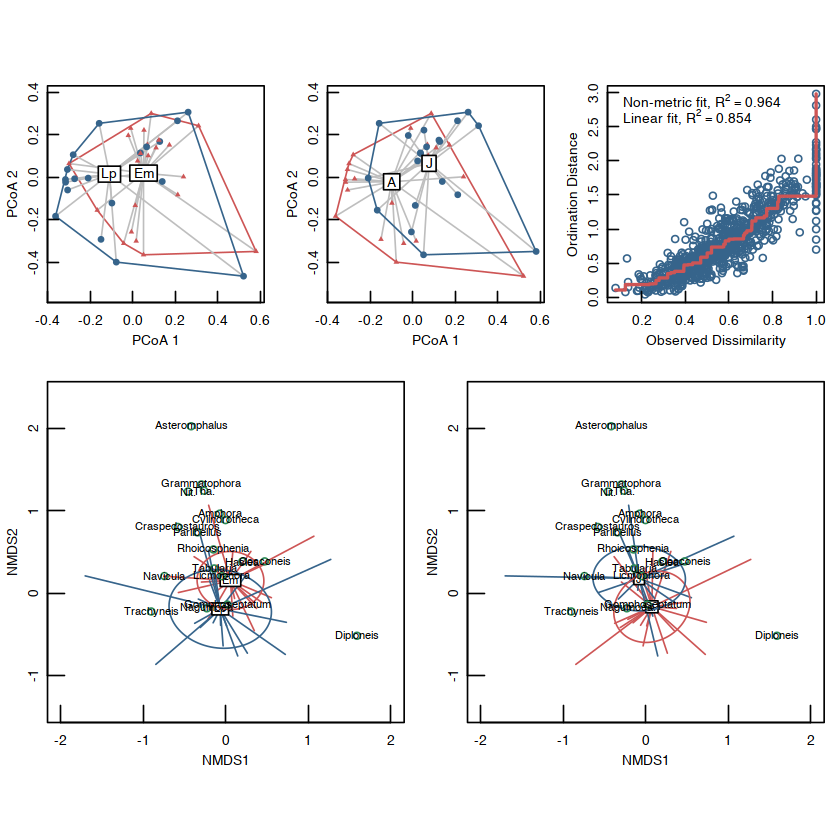

In [11]:
col <- c("indianred3", "steelblue4")
pch <- c(17, 19)
opar <- par()
plt1 <- layout(rbind(c(1, 1, 2, 2, 3, 3),
                     c(4, 4, 4, 5, 5, 5)),
               heights = c(2, 3),
               respect = TRUE)

# layout.show(plt1)

par(mar = c(3,3,1,1))

# plot 1
plot(mod.spp, main = NULL,
     tck = .05, mgp = c(1.8, 0.5, 0), col = col, pch = pch,
     sub = NULL)

# plot 2
plot(mod.size, main = NULL,
     tck = .05, mgp = c(1.8, 0.5, 0), col = col, pch = pch,
     sub = NULL)

# plot 3
stressplot(spp.nmds, p.col = "steelblue4", l.col = "indianred3",
           tck = .05, mgp = c(1.8, 0.5, 0))

# plot 4
par(mar = c(3,3,2,1))
plot(spp.nmds, display = "sites", type = "n",
     main = NULL,
     tck = .05, mgp = c(1.8, 0.5, 0),
     xlim = c(-2, 2), ylim = c(-1, 2))
with(env,
     points(spp.nmds, display = "sites", col = col[host_spp],
            pch = pch[host_spp]))
with(env,
     ordispider(spp.nmds, groups = host_spp,
                label = TRUE,
                col = col))
with(env, ordiellipse(spp.nmds, groups = host_spp,
                      col = col, label = FALSE))
points(spp.nmds, display = "species", pch = 1, col = "seagreen")
orditorp(spp.nmds, display = "species", cex = 0.8,
         col = "black", air = 0.01)

# plot 5
par(mar = c(3, 3, 2, 1))
plot(spp.nmds, display = "sites", type = "n",
     main = NULL,
     tck = .05, mgp = c(1.8, 0.5, 0),
     xlim = c(-2, 2), ylim = c(-1, 2))
with(env,
     points(spp.nmds, display = "sites", col = col[host_size],
            pch = pch[host_size]))
with(env,
     ordispider(spp.nmds, groups = host_size,
                label = TRUE,
                col = col))
with(env, ordiellipse(spp.nmds, groups = host_size,
                      col = col, label = FALSE))
points(spp.nmds, display = "species", pch = 1, col = "seagreen")
orditorp(spp.nmds, display = "species", cex = 0.8,
         col = "black", air = 0.01)
# dev.off()
par(opar)

## Multivariate abundance using Generalised Linear Models

I'll not discuss this method here, but merely repeat the code as used in the Mayombo et al. (2019) paper. For background to the Multivariate abundance using Generalised Linear Models approach, refer to Wang et al. (2012, 2018).

In [12]:
library(mvabund)
diat_spp <- mvabund(spp2)

Look at the spread of the data using the boxplot function. The figure is not used in paper:

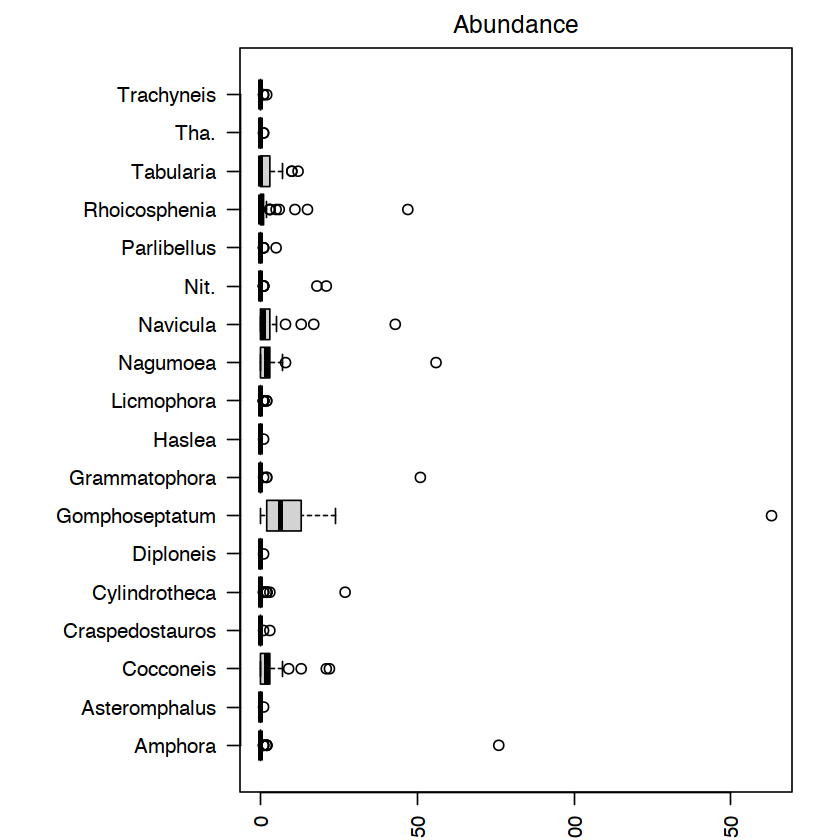

In [13]:
par(mar = c(2, 10, 2, 2)) # adjusts the margins
boxplot(spp, horizontal = TRUE, las = 2, main = "Abundance")

Check the mean-variance relationship:

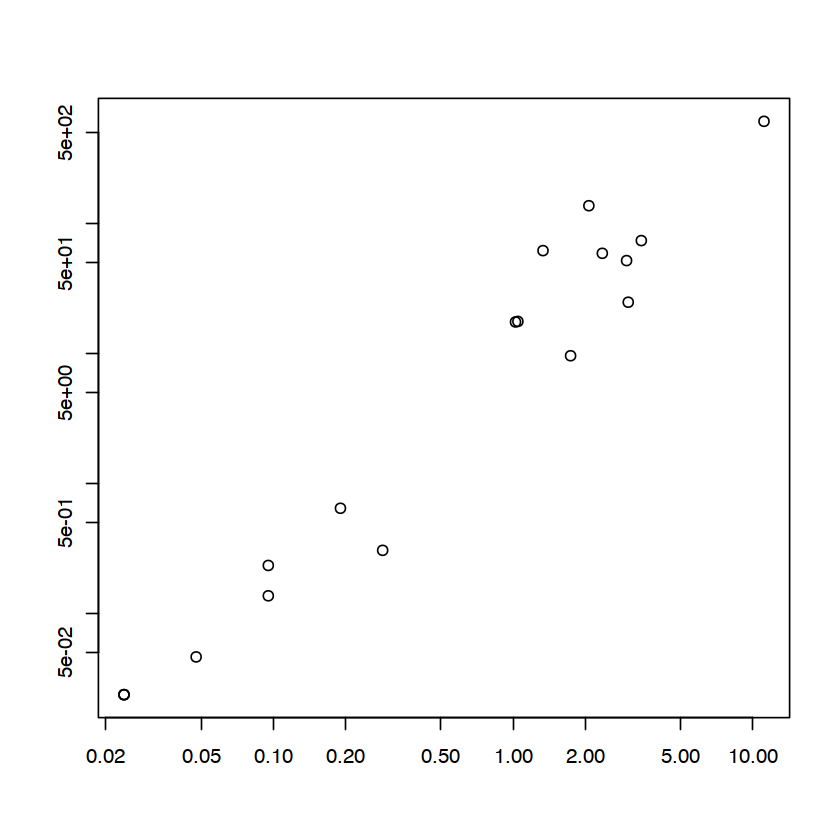

In [14]:
meanvar.plot(diat_spp)

The above plot shows that spp with a high mean also have a high variance.

1. Are there differences in the species composition of the diatom spp. sampled? *This has already been addressed above, but we can apply an lternative approach below*.
2. Do some of them specialise on particular spp of kelp, while others are more generalised? *Addressed below*.
3. Do some occur more on juveniles, while some are on adults, and which ones indiscriminately live across age classes? *Addressed below*.
4. Which species? *Addressed below*.

Scale manually for `ggplot2()` custom plot. Create a scale function:

In [15]:
log_fun <- function(x) {
  min_x <- min(x[x != 0], na.rm = TRUE)
  a <- log(x) / min_x
  a[which(!is.finite(a))] <- 0
  return(a)
}

Make a plot that shows which diatoms species are responsible for differences between adult and juvenile kelps:

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


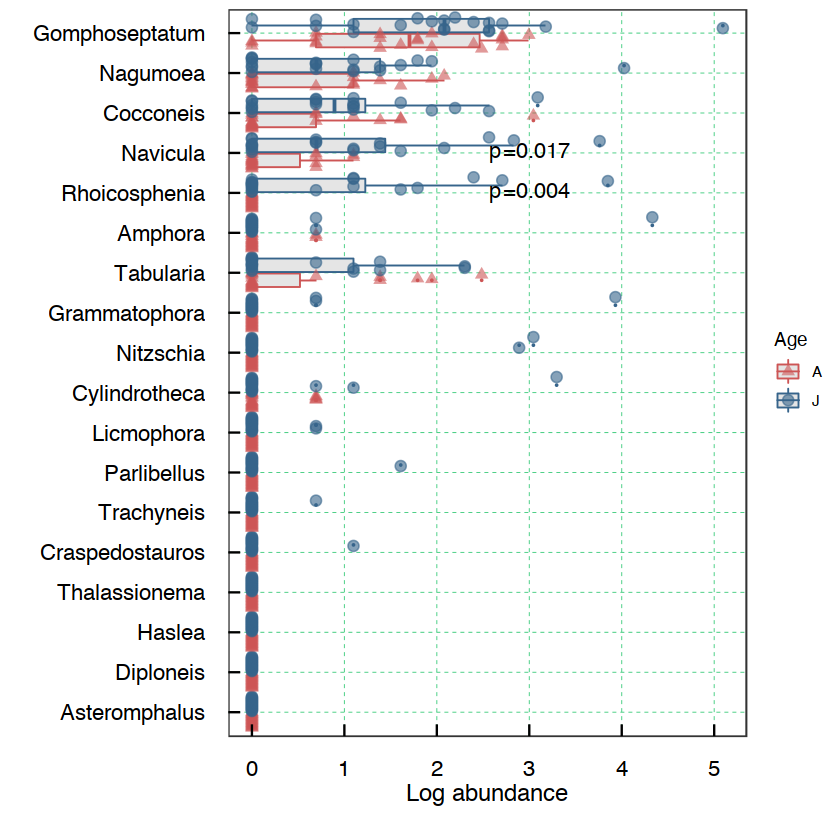

In [16]:
spp2 %>%
  mutate(host_size = env$host_size) %>%
  gather(key = species, value = abund, -host_size) %>%
  as_tibble() %>%
  group_by(species) %>%
  mutate(log.abund = log_fun(abund)) %>%
  ungroup() %>%
  ggplot(aes(x = fct_reorder(species, abund, .fun = mean), y = log.abund)) +
  geom_boxplot(aes(colour = host_size), size = 0.4, outlier.size = 0,
               fill = "grey90") +
  geom_point(aes(colour = host_size, shape = host_size),
             position = position_dodge2(width = 0.8),
             alpha = 0.6, size = 2.5) +
  scale_colour_manual(name = "Age", values = c("indianred3", "steelblue4")) +
  scale_shape_manual(name = "Age", values = c(17, 19)) +
  annotate("text", x = 15, y = 3, size = 4.5,
           label = expression(paste(italic("p"), "=0.017"))) +
  annotate("text", x = 14, y = 3, size = 4.5,
           label = expression(paste(italic("p"), "=0.004"))) +
  scale_y_continuous(name = "Log abundance") +
  coord_flip() + theme_bw() +
  theme(panel.grid.major = element_line(linetype = "dashed",
                                        colour = "seagreen3", size = 0.2),
        panel.grid.minor = element_blank(),
        axis.text.x = element_text(size = 13, color = "black",
                                   margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")),
        axis.text.y = element_text(size = 13, color = "black", face = "italic",
                                   margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")),
        axis.title.x = element_text(size = 14, vjust = 5.75, color = "black"),
        axis.title.y = element_blank(),
        axis.ticks.length = unit(-0.25, "cm"),
        axis.ticks = element_line(color = "black", size = 0.5))

I settle on a negative binomial distribution for the species data. This will be provided to the `manyglm()` function:

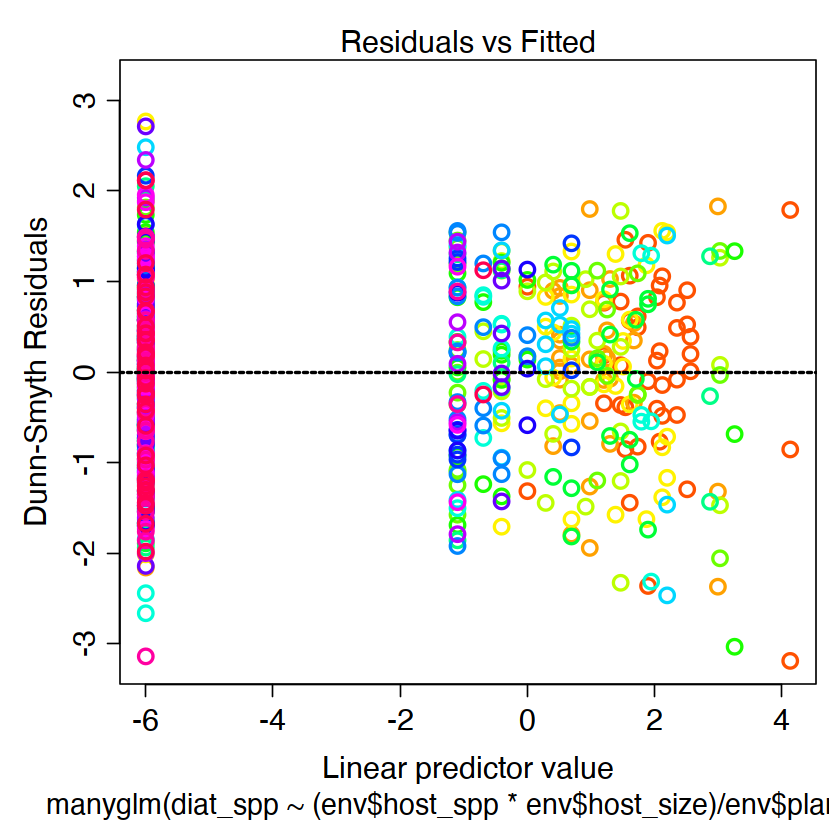

In [17]:
size_mod2 <- manyglm(diat_spp ~ (env$host_spp * env$host_size) / env$plant,
                     family = "negative binomial")
plot(size_mod2) # better residuals...

In [18]:
# anova(size_mod2, test = "wald")
out <- anova(size_mod2, p.uni = "adjusted", test = "wald")
out$table

Time elapsed: 0 hr 0 min 24 sec


,Res.Df,Df.diff,wald,Pr(>wald)
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),41,NA,NA,NA
env$host_spp,40,1,5.227772,0.312
env$host_size,39,1,7.799205,0.005
env$host_spp:env$host_size,38,1,5.434128,0.009
env$host_spp:env$host_size:env$plant,26,16,NaN,0.001


What is the proportional contribution of some important species to juvenile and adult plants?

In [19]:
prop.contrib <- data.frame(spp = colnames(out$uni.test),
                           prop = out$uni.test[3, ],
                           row.names = NULL)
prop.contrib %>%
  mutate(perc = round((prop / sum(prop)) * 100, 1)) %>%
  arrange(desc(perc)) %>%
  mutate(cum = cumsum(perc))

spp,prop,perc,cum
<chr>,<dbl>,<dbl>,<dbl>
Rhoicosphenia,4.05979831,16.7,16.7
Navicula,3.65789127,15.1,31.8
Nitzschia,2.65842186,10.9,42.7
Amphora,2.39874550,9.9,52.6
Cocconeis,2.10936669,8.7,61.3
Nagumoea,1.92435482,7.9,69.2
Gomphoseptatum,1.86301773,7.7,76.9
Cylindrotheca,1.79282759,7.4,84.3
Parlibellus,1.40898477,5.8,90.1


## References

Anderson MJ, and Walsh DCI (2013). PERMANOVA, ANOSIM, and the Mantel test in the face of heterogeneous dispersions: What null hypothesis are you testing? Ecological Monographs, 83(4), 557–574. http://doi.org/10.1890/12-2010.1

Mayombo NAS, Majewska R, and Smit AJ (2019). African Journal of Marine Science 2019, 41(2): 221–229

Wang Y, Naumann U, Wright ST, and Warton DI (2012). mvabund – an R package for model-based analysis of multivariate abundance data. Methods in Ecology and Evolution 3: 471–474.

Wang Y, Naumann U, Eddelbuettel D, and Warton DI (2018). mvabund: statistical methods for analysing multivariate abundance data. R package version 3.13.1.